In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows = 30
pd.options.display.max_columns = 60

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/opgg/12일차/2021_LoL_esports_match_data_from_OraclesElixir_20211201.csv')
df = df[df['league']=='LCK'].copy()
df.reset_index(drop=True, inplace=True)
columns = list(df.columns)

In [ ]:
df.shape

In [ ]:
df[['firstblood']].isnull().sum()

firstblood    0
dtype: int64

In [21]:
summary_df = df.copy()

summary_df['killsdiffat15'] = summary_df['killsat15'] - summary_df['opp_killsat15']
summary_df['assistsdiffat15'] = summary_df['assistsat15'] - summary_df['opp_assistsat15']
summary_df['deathsdiffat15'] = summary_df['deathsat15'] - summary_df['opp_deathsat15']
summary_df = summary_df.replace({'deaths':0}, {'deaths':1})
summary_df['KDA'] = (summary_df['kills'] + summary_df['assists'])/(summary_df['deaths'])

summary_col_list = ['playername','position',
 'golddiffat15','xpdiffat15','csdiffat15',
 'killsdiffat15','assistsdiffat15','deathsdiffat15',
 'damagetochampions','damageshare',
 'damagemitigatedperminute', 'wardsplaced','wardskilled',
 'controlwardsbought','visionscore','totalgold','total cs','monsterkills',
 'monsterkillsownjungle','monsterkillsenemyjungle','firstblood',
 'firstdragon','dragons','elders','firstherald',
 'heralds','firstbaron','barons','firsttower','towers',
 'result','KDA']

time_col_list = ['damagetochampions','damageshare',
 'damagemitigatedperminute', 'wardsplaced','wardskilled',
 'controlwardsbought','visionscore','totalgold','total cs','monsterkills',
 'monsterkillsownjungle','monsterkillsenemyjungle']

for col in time_col_list:
    summary_df[col] = summary_df[col]/summary_df['gamelength']

summary_df = summary_df[summary_col_list].copy()

In [22]:
summary_df

,playername,position,golddiffat15,xpdiffat15,csdiffat15,killsdiffat15,assistsdiffat15,deathsdiffat15,damagetochampions,damageshare,damagemitigatedperminute,wardsplaced,wardskilled,controlwardsbought,visionscore,totalgold,total cs,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,firstblood,firstdragon,dragons,elders,firstherald,heralds,firstbaron,barons,firsttower,towers,result,KDA
0,Rascal,top,1548.0,1464.0,-8.0,3.0,1.0,-4.0,10.228296,0.000157,0.349910,0.005053,0.011024,0.003675,0.023886,8.448323,0.153881,0.023886,0.006431,0.009187,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,13.000000
1,Clid,jng,903.0,1005.0,12.0,1.0,3.0,1.0,6.114378,0.000094,0.121321,0.019752,0.012402,0.005512,0.044097,6.153881,0.125402,0.101975,0.058797,0.011943,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3.333333
2,Bdd,mid,-261.0,-225.0,-20.0,1.0,1.0,0.0,6.058337,0.000093,0.397563,0.008728,0.007809,0.006431,0.020211,6.897106,0.146532,0.013321,0.007350,0.003675,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,10.000000
3,Ruler,bot,-44.0,-205.0,-4.0,0.0,1.0,0.0,5.967386,0.000092,0.068972,0.008728,0.005053,0.005053,0.020671,8.032154,0.184658,0.011943,0.007809,0.001837,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,10.000000
4,Life,sup,-55.0,-258.0,6.0,0.0,0.0,-2.0,1.499311,0.000023,0.099077,0.030776,0.012862,0.009187,0.051447,4.038126,0.025723,0.000000,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5863,Faker,mid,-197.0,-556.0,0.0,0.0,-3.0,-1.0,9.406513,0.000146,0.120739,0.008984,0.005053,0.003369,0.019652,6.860191,0.148231,0.003930,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1,4.500000
5864,Gumayusi,bot,920.0,417.0,4.0,1.0,-2.0,2.0,8.205503,0.000127,0.220728,0.010668,0.005053,0.005053,0.025828,7.637844,0.152723,0.019652,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1,4.000000
5865,Keria,sup,92.0,349.0,6.0,-1.0,1.0,-1.0,2.582819,0.000040,0.267298,0.034812,0.010668,0.012914,0.053902,3.984840,0.024144,0.000000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1,1.750000
5866,NaN,team,-1563.0,-635.0,-50.0,2.0,6.0,-2.0,28.056148,NaN,1.068040,0.066816,0.036496,0.037058,0.146547,27.957889,NaN,0.104436,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,2.750000


In [23]:
top_df = summary_df[summary_df['position']=='top'].copy()
top_df = top_df.drop(columns=['position'])
top_df = top_df.reset_index(drop=True)
top_df = top_df.dropna(axis=1)

mid_df = summary_df[summary_df['position']=='mid'].copy()
mid_df = mid_df.drop(columns=['position'])
mid_df = mid_df.reset_index(drop=True)
mid_df = mid_df.dropna(axis=1)

jng_df = summary_df[summary_df['position']=='jng'].copy()
jng_df = jng_df.drop(columns=['position'])
jng_df = jng_df.reset_index(drop=True)
jng_df = jng_df.dropna(axis=1)

bot_df = summary_df[summary_df['position']=='bot'].copy()
bot_df = bot_df.drop(columns=['position'])
bot_df = bot_df.reset_index(drop=True)
bot_df = bot_df.dropna(axis=1)

sup_df = summary_df[summary_df['position']=='sup'].copy()
sup_df = sup_df.drop(columns=['position'])
sup_df = sup_df.reset_index(drop=True)
sup_df = sup_df.dropna(axis=1)

team_df = summary_df[summary_df['position']=='team'].copy()
team_df = team_df.drop(columns=['position'])
team_df = team_df.reset_index(drop=True)
team_df = team_df.dropna(axis=1)

In [24]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

def encoder(df):
    le = LabelEncoder()
    labels = le.fit_transform(df.iloc[:,0])
    df.iloc[:,0] = labels
    return df

top_df = encoder(top_df)
mid_df = encoder(mid_df)
jng_df = encoder(jng_df)
bot_df = encoder(bot_df)
sup_df = encoder(sup_df)

def scaler(df):
    scaler = MinMaxScaler()
    df.iloc[:,1:] = scaler.fit_transform(df.iloc[:,1:])
    return df

top_df = scaler(top_df)
mid_df = scaler(mid_df)
jng_df = scaler(jng_df)
bot_df = scaler(bot_df)
sup_df = scaler(sup_df)

In [25]:
top_df

,playername,golddiffat15,xpdiffat15,csdiffat15,killsdiffat15,assistsdiffat15,deathsdiffat15,damagetochampions,damageshare,damagemitigatedperminute,wardsplaced,wardskilled,controlwardsbought,visionscore,totalgold,total cs,monsterkills,firstblood,result,KDA
0,10,0.722478,0.822894,0.437500,0.8,0.583333,0.1,0.521206,0.472512,0.220937,0.204099,0.760680,0.430409,0.536071,0.830052,0.730708,0.533713,1.0,1.0,0.650000
1,3,0.277522,0.177106,0.562500,0.2,0.416667,0.9,0.201437,0.228361,0.105037,0.576940,0.221865,0.591812,0.221209,0.136630,0.401615,0.000000,0.0,0.0,0.007143
2,3,0.395803,0.474195,0.468750,0.4,0.333333,0.6,0.628125,0.538526,0.335949,0.405170,0.115000,0.260278,0.173488,0.342421,0.627753,0.124134,0.0,0.0,0.033333
3,10,0.604197,0.525805,0.531250,0.6,0.666667,0.4,0.411937,0.354955,0.342655,0.200201,0.153333,0.325347,0.082820,0.738730,0.735453,0.198614,0.0,1.0,0.650000
4,1,0.478155,0.592633,0.390625,0.5,0.583333,0.4,0.124754,0.265353,0.153080,0.230331,0.111952,0.316725,0.180088,0.408627,0.545966,0.132929,1.0,1.0,0.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,9,0.310721,0.333039,0.539062,0.2,0.583333,0.6,0.207000,0.197505,0.133855,0.349593,0.311591,0.528914,0.460652,0.563954,0.740495,0.336338,1.0,1.0,0.100000
974,1,0.501150,0.419938,0.554688,0.4,0.500000,0.6,0.461394,0.381482,0.076558,0.198864,0.281250,0.424366,0.362512,0.407339,0.483458,0.283349,0.0,0.0,0.080000
975,9,0.498850,0.580062,0.445312,0.6,0.500000,0.4,0.384959,0.280608,0.285929,0.332539,0.250000,0.583503,0.244249,0.657718,0.632334,0.141674,0.0,1.0,0.233333
976,9,0.485915,0.498236,0.328125,0.6,0.583333,0.3,0.143578,0.198978,0.195312,0.411292,0.387423,0.657636,0.489499,0.371657,0.470120,0.200733,1.0,0.0,0.300000


In [26]:
top_result = top_df['result'] # y value == 종속  variable, target variable이 되어야 하므로 분리
top_result
top_other = top_df.drop(['result'],axis=1) # 그 외는 X

In [27]:
# randomforest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(top_other, top_result, test_size=0.1, random_state = 156)

rf_clf = RandomForestClassifier()

estimators = [rf_clf]

for estimator in estimators:
  estimator.fit(X_train, y_train)
  predict = estimator.predict(X_test)
  class_name = estimator.__class__.__name__
  print('{} Classifier Accuracy: {}'.format(class_name, accuracy_score(y_test,predict)))

RandomForestClassifier Classifier Accuracy: 0.8979591836734694


In [31]:
# k-fold cross validation
from sklearn.model_selection import cross_val_score
X, y = top_other, top_result
kf = RandomForestClassifier()

cross_score = cross_val_score(kf, X, y, scoring='accuracy', cv=5)
print('교차 검증별 정확도:',np.round(cross_score, 4))
print('평균 검증 정확도:', np.round(np.mean(cross_score), 4))

교차 검증별 정확도: [0.8724 0.8776 0.8673 0.8769 0.8923]
평균 검증 정확도: 0.8773


In [11]:
# GridSearchCV
from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(top_other, top_result, test_size=0.2, random_state = 156)

params = {
    'n_estimators': [100],
    'max_depth': [2, 4, 6, 8],
    'min_samples_leaf': [2, 4, 6, 8],
    'min_samples_split': [2, 4, 6, 8]
}
model = RandomForestClassifier(n_jobs=-1)
grid_cv = GridSearchCV(model, param_grid=params, cv=5, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('Best Hyper Param: ', grid_cv.best_params_)
print('Best predict Accuarcy: ', grid_cv.best_score_)

Best Hyper Param:  {'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 100}
Best predict Accuarcy:  0.8784991017475094


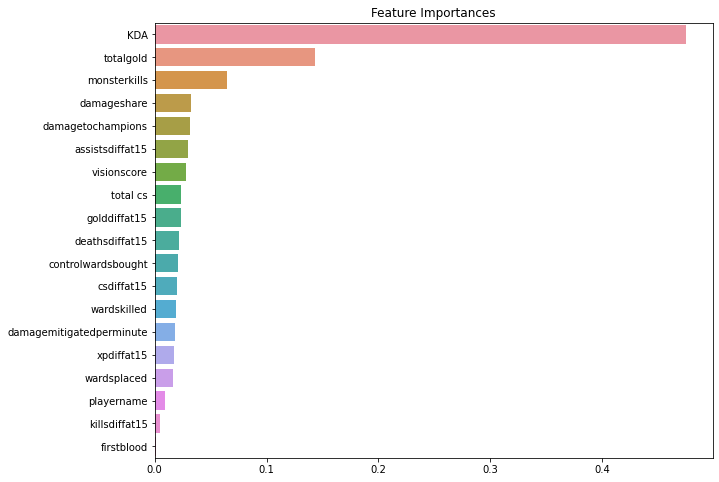

In [12]:
ftr_importances_values = grid_cv.best_estimator_.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=top_other.columns)
ftr_importances = ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(10,8))
plt.title('Feature Importances')
sns.barplot(x=ftr_importances, y=ftr_importances.index)